In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
link = 'https://drive.google.com/file/d/1TGHekDPdbJQjF8iLP5J58T0clqz2rrjL/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+ link.split("/")[-2]
df = pd.read_csv(path)
df.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,points,badges_cnt,has_student_cnt,difficulty,learning_stage,cheating
0,2019-05-01 06:45:00+00:00,dJk8f4bqY/iRA7oVNzBYM8vtOm8XvgPxcoYy+mOwTuY=,tcefpcahExZLA6gms/r4H1DHPHzmBUwg8h7hfNlV4sc=,4pDOyeqUIPE/UY/LZjK2y/MsUUB5/+BsQcTsj8BMzFQ=,3,1,True,8,1,0,False,275719,10,0,easy,elementary,0
1,2019-05-01 07:30:00+00:00,yMtJ95VxxbuqWsxV5OicL3TYo86oC0Rn9iKy8cUm90s=,3cg9wquB/Sf1whKNOekAQ/XUQcTUeXeW01l06R+BbNE=,S0j1Ry8rhnymKIp/9fiiMiQVvu1J8a9VI/yKtwclACo=,8,1,True,8,1,0,False,60837,10,0,easy,elementary,0
2,2019-05-01 07:45:00+00:00,r4xa2pAreiDQeNzIJYkk/8IOzKJGvKqBguTqsIsKauU=,ViIxd7sl/Dp2C0nC24swu3Cm5o8UkaEMgyMuUp7pq0g=,t7MThCasM6oaABNzFzljWWlWNmHSFHauc4tCFAY+eAU=,8,2,True,46,1,0,False,582498,97,0,easy,elementary,0
3,2019-05-01 08:15:00+00:00,ESTiGJ4iybOV7T+zrZw+AgE0g8UNj7ZTbdpnMCd2R2U=,00KEZbwE/6qJ+WSl9TwUEgbwi/wmnEVgeCnGzi4/EYo=,zbLAOaiLjHZDCBc6rPbuDqwsvUSeFxk9ofM4KBwwQes=,5,1,True,33,1,0,False,21300,1,0,normal,elementary,0
4,2019-05-01 08:15:00+00:00,fo0e8Za+Io+VdNu3Hy4GE2Ux1mTh76k2igiZtrThMCo=,00KEZbwE/6qJ+WSl9TwUEgbwi/wmnEVgeCnGzi4/EYo=,ged8VYe3DG5I55+Vkw+lP2LatMfGOor3nA6LILELx4E=,5,1,True,115,1,0,False,13125,1,0,normal,elementary,0


In [ ]:
df = df.drop(columns = ['uuid', 'ucid', 'upid'])

In [ ]:
difficulty_encoded = pd.get_dummies(df['difficulty'], prefix='difficulty')
df = pd.concat([df, difficulty_encoded], axis=1)
df = df.drop('difficulty', axis=1)

df['learning_stage'] = df['learning_stage'].replace({'elementary': 1, 'junior': 2, 'senior': 3})

<ipython-input-4-72fc1d8677a3>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['learning_stage'] = df['learning_stage'].replace({'elementary': 1, 'junior': 2, 'senior': 3})


In [ ]:
df['is_correct'] = df['is_correct'].astype(int)
df['is_hint_used'] = df['is_hint_used'].astype(int)

In [ ]:
df['timestamp_TW'] = pd.to_datetime(df['timestamp_TW'])

df['hour'] = df['timestamp_TW'].dt.hour
df['minute'] = df['timestamp_TW'].dt.minute
df['weekday'] = df['timestamp_TW'].dt.weekday
df['day'] = df['timestamp_TW'].dt.day
df['month'] = df['timestamp_TW'].dt.month

In [ ]:
df =df.drop(columns = 'timestamp_TW')

In [ ]:
df.head()

,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,points,badges_cnt,has_student_cnt,learning_stage,cheating,difficulty_easy,difficulty_hard,difficulty_normal,hour,minute,weekday,day,month
0,3,1,1,8,1,0,0,275719,10,0,1,0,True,False,False,6,45,2,1,5
1,8,1,1,8,1,0,0,60837,10,0,1,0,True,False,False,7,30,2,1,5
2,8,2,1,46,1,0,0,582498,97,0,1,0,True,False,False,7,45,2,1,5
3,5,1,1,33,1,0,0,21300,1,0,1,0,False,False,True,8,15,2,1,5
4,5,1,1,115,1,0,0,13125,1,0,1,0,False,False,True,8,15,2,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   problem_number                   12537 non-null  int64
 1   exercise_problem_repeat_session  12537 non-null  int64
 2   is_correct                       12537 non-null  int64
 3   total_sec_taken                  12537 non-null  int64
 4   total_attempt_cnt                12537 non-null  int64
 5   used_hint_cnt                    12537 non-null  int64
 6   is_hint_used                     12537 non-null  int64
 7   points                           12537 non-null  int64
 8   badges_cnt                       12537 non-null  int64
 9   has_student_cnt                  12537 non-null  int64
 10  learning_stage                   12537 non-null  int64
 11  cheating                         12537 non-null  int64
 12  difficulty_easy                  12537 non-nul

In [ ]:
X = df.drop(columns = "cheating")
y = df["cheating"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 43)

print(X_train.shape, X_test.shape)

(10029, 19) (2508, 19)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
model_over_sampl = RandomOverSampler(random_state=42)
X_over, y_over = model_over_sampl.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_over.value_counts())

cheating
0    9227
1     802
Name: count, dtype: int64
cheating
0    9227
1    9227
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5], y_train.head()

(array([[-0.29789332, -0.19103231,  0.55970083, -0.09363967, -0.21742235,
         -0.36943913, -0.44226059, -0.69645264, -0.61268055, -0.04939384,
         -0.74947307,  0.99190445, -0.42737042, -0.72013732, -0.96859336,
          1.25531728,  0.2824891 ,  1.40858232, -1.01595032],
        [-0.15401221, -0.19103231, -1.78666879,  0.15626111,  4.47503544,
          2.08795475,  2.26111036,  0.05964908,  0.92552193, -0.04939384,
         -0.74947307, -1.00816162,  2.33989054, -0.72013732,  1.31351964,
         -0.53015616, -1.23927421, -0.12744643,  0.9843001 ],
        [ 0.04742136, -0.19103231, -1.78666879,  0.03131072,  0.56465395,
          1.26882345,  2.26111036, -0.58008236, -0.26156911, -0.04939384,
          1.31698084,  0.99190445, -0.42737042, -0.72013732,  0.17246314,
         -0.53015616, -0.73201977, -0.83638277,  0.9843001 ],
        [ 0.99703673,  0.27694994,  0.55970083, -0.21859006, -0.21742235,
         -0.36943913, -0.44226059, -0.64443225, -0.512363  , -0.04939384,


              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2294
           1       0.52      0.73      0.61       214

    accuracy                           0.92      2508
   macro avg       0.75      0.84      0.78      2508
weighted avg       0.94      0.92      0.93      2508



<Axes: >

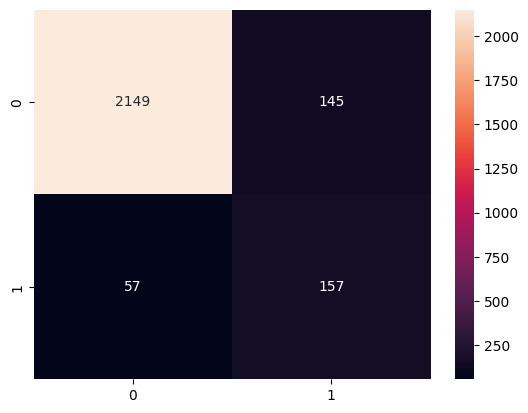

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
model_xgboost_tuning = xgb.XGBClassifier()
# Create Grid Search with param_grid
param_grid = {
    'learning_rate': [0.15],
    'max_depth': [5],
    'n_estimators': [190],
    'booster': ['gbtree'],
    'min_child_weight': [1],
    'subsample': [1],
    'colsample_bytree': [0.9],
    'colsample_bylevel': [0.6],
    'colsample_bynode': [1]
}
grid_search = GridSearchCV(estimator=model_xgboost_tuning, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_scaled, y_over)
model_xgboost_tuning = grid_search.best_estimator_
y_proba = model_xgboost_tuning.predict_proba(X_test_scaled)
y_scores = y_proba[:, 1]
threshold = 0.25
y_pred_threshold = (y_scores >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_threshold))

cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot = True, fmt = "g")

In [ ]:
# Merge X_test (original, unscaled data) with predicted labels and cheating probability
test_results = X_test.copy()  #Copy X_test to keep original data intact
test_results["Predicted_Label"] = y_pred_threshold  # Add predicted label
test_results["Predicted_Probability_Cheat"] = y_scores  # Add prediction probability

# Show only rows with Predicted_Label = 1
cheating_cases_xgboost = test_results[test_results["Predicted_Label"] == 1]

cheating_cases_xgboost

,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,points,badges_cnt,has_student_cnt,...,difficulty_easy,difficulty_hard,difficulty_normal,hour,minute,weekday,day,month,Predicted_Label,Predicted_Probability_Cheat
10293,10,1,0,69,2,1,1,249608,20,0,...,True,False,False,21,15,5,8,6,1,0.257925
1748,8,2,1,5,1,0,0,39379,19,0,...,False,True,False,0,45,6,12,5,1,0.996666
2151,5,1,1,3,1,0,0,25518,8,0,...,True,False,False,16,45,1,14,5,1,0.999064
4880,2,1,1,3,1,0,0,433787,69,0,...,True,False,False,21,0,3,30,5,1,0.991507
12436,1,1,1,19,1,0,0,102048,17,0,...,True,False,False,21,15,1,11,6,1,0.268713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,3,1,1,16,1,0,0,236475,29,0,...,True,False,False,16,0,1,21,5,1,0.529831
4923,4,1,1,26,1,0,0,106773,16,0,...,False,False,True,8,45,4,31,5,1,0.964305
4131,6,1,1,15,1,0,0,101968,13,0,...,True,False,False,11,45,0,27,5,1,0.277831
8086,3,1,0,46,2,2,1,171174,29,0,...,True,False,False,21,15,1,4,6,1,0.399030


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Info] Number of positive: 9227, number of negative: 9227
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 18454, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

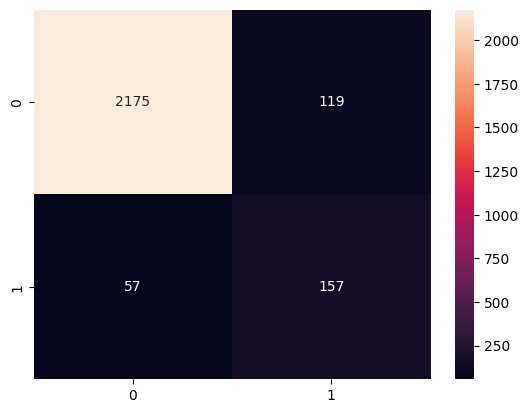

In [ ]:
import lightgbm as lgb
model_lightgbm_tuning = lgb.LGBMClassifier()
# Xây dựng Grid Search với param_grid
param_grid = {
    'learning_rate': [0.2],
    'max_depth': [5],
    'n_estimators': [100],
    'booster': ['gbtree'],
    'min_child_weight': [1],
    'subsample': [1],
    'colsample_bytree': [0.9],
    'colsample_bylevel': [0.6],
    'colsample_bynode': [1]
}
grid_search = GridSearchCV(estimator=model_lightgbm_tuning, param_grid=param_grid, cv=3, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_scaled, y_over)
model_lightgbm_tuning = grid_search.best_estimator_
y_proba_lgbm = model_lightgbm_tuning.predict_proba(X_test_scaled)
y_scores_lgbm = y_proba_lgbm[:, 1]
threshold_lgbm = 0.3
y_pred_threshold_light = (y_scores_lgbm >= threshold_lgbm).astype(int)

print(classification_report(y_test, y_pred_threshold_light))

cm = confusion_matrix(y_test, y_pred_threshold_light)
sns.heatmap(cm, annot = True, fmt = "g")

In [ ]:
test_results = X_test.copy()  #Copy X_test to keep original data intact
test_results["Predicted_Label"] = y_pred_threshold_light  # Add predicted label
test_results["Predicted_Probability_Cheat"] = y_scores_lgbm  # Add prediction probability

# Show only rows with Predicted_Label = 1
cheating_cases_lightgbm = test_results[test_results["Predicted_Label"] == 1]

cheating_cases_lightgbm

,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,points,badges_cnt,has_student_cnt,...,difficulty_easy,difficulty_hard,difficulty_normal,hour,minute,weekday,day,month,Predicted_Label,Predicted_Probability_Cheat
1748,8,2,1,5,1,0,0,39379,19,0,...,False,True,False,0,45,6,12,5,1,0.997973
9207,45,4,0,50,3,0,0,110791,18,0,...,False,False,True,15,45,3,6,6,1,0.374115
2151,5,1,1,3,1,0,0,25518,8,0,...,True,False,False,16,45,1,14,5,1,0.998974
4880,2,1,1,3,1,0,0,433787,69,0,...,True,False,False,21,0,3,30,5,1,0.993799
312,127,12,1,2,1,0,0,450613,52,0,...,False,False,True,17,0,3,2,5,1,0.980586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,10,1,1,6,1,0,0,25204,4,0,...,False,False,True,14,15,4,31,5,1,0.991942
10304,15,1,0,6,1,6,1,505611,85,0,...,False,False,True,21,45,5,8,6,1,0.998497
1743,10,1,1,3,1,0,0,1830285,234,0,...,True,False,False,22,45,5,11,5,1,0.997713
8979,11,1,0,8,1,0,0,23100,1,0,...,True,False,False,11,30,3,6,6,1,0.404670


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2294
           1       0.67      0.74      0.71       214

    accuracy                           0.95      2508
   macro avg       0.82      0.85      0.84      2508
weighted avg       0.95      0.95      0.95      2508



<Axes: >

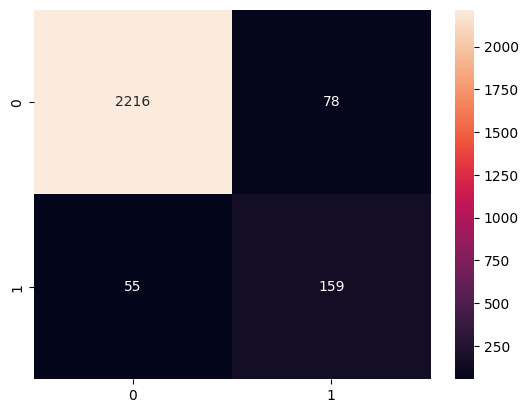

In [ ]:
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'max_depth': [20],
    'n_estimators': [220],
    'min_samples_split': [30],
    'min_samples_leaf': [10],
    'max_features': ["sqrt"]
}

model_random_forest = RandomForestClassifier(random_state=42)

model_random_forest_grid_search = GridSearchCV(model_random_forest, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

model_random_forest_grid_search.fit(X_train_scaled, y_over)

y_proba_rf = model_random_forest_grid_search.predict_proba(X_test_scaled)
y_scores_rf = y_proba_rf[:, 1]
threshold_rf = 0.3
y_pred_threshold_rf = (y_scores_rf >= threshold_rf).astype(int)


print(classification_report(y_test, y_pred_threshold_rf))
cm = confusion_matrix(y_test, y_pred_threshold_rf)
sns.heatmap(cm, annot = True, fmt = "g")

In [ ]:
test_results = X_test.copy()  #Copy X_test to keep original data intact
test_results["Predicted_Label"] = y_pred_threshold_rf  # Add predicted label
test_results["Predicted_Probability_Cheat"] = y_scores_rf  # Add prediction probability

# Show only rows with Predicted_Label = 1
cheating_cases_rf = test_results[test_results["Predicted_Label"] == 1]

cheating_cases_rf

,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,points,badges_cnt,has_student_cnt,...,difficulty_easy,difficulty_hard,difficulty_normal,hour,minute,weekday,day,month,Predicted_Label,Predicted_Probability_Cheat
1748,8,2,1,5,1,0,0,39379,19,0,...,False,True,False,0,45,6,12,5,1,0.960128
2151,5,1,1,3,1,0,0,25518,8,0,...,True,False,False,16,45,1,14,5,1,0.944419
4880,2,1,1,3,1,0,0,433787,69,0,...,True,False,False,21,0,3,30,5,1,0.787835
312,127,12,1,2,1,0,0,450613,52,0,...,False,False,True,17,0,3,2,5,1,0.900324
4483,13,1,1,47,1,0,0,273922,76,0,...,False,False,True,20,30,1,28,5,1,0.333724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,10,1,1,6,1,0,0,25204,4,0,...,False,False,True,14,15,4,31,5,1,0.975062
10304,15,1,0,6,1,6,1,505611,85,0,...,False,False,True,21,45,5,8,6,1,0.617634
1743,10,1,1,3,1,0,0,1830285,234,0,...,True,False,False,22,45,5,11,5,1,0.841792
8027,1,1,1,10,1,0,0,34761,4,0,...,False,False,True,20,15,1,4,6,1,0.319120
